In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
PATH = '/content/drive/My Drive/Colab Notebooks/욕설'

In [3]:
!pip install autokeras keras-tuner konlpy

     |████████████████████████████████| 174kB 7.9MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 19.4MB 155kB/s 
     |████████████████████████████████| 460kB 53.0MB/s 
     |████████████████████████████████| 92kB 14.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=64010c94572924db2bd26f4f1dd8ea46a185595f648c20196e5f141a16fb752d
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=f8a540d85d85141c40d827458a606cdaaf14f511bb48771e005461ffb03ea856
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing

In [4]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
%cd ..

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-02-04 16:07:46--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=wBdKFmEgoQvM7rCIYoOo7OrMXUA%3D&Expires=1612455868&AWSAccessKeyId=AKIA6KO

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import autokeras as ak
from konlpy.tag import Mecab

In [6]:
train = pd.read_csv(PATH + "/ko_train_label.csv")

#test = pd.read_csv(PATH + "news_test.csv") test셋이 존재하지 않으므로 주석 처리
#submission = pd.read_csv(PATH + "sample_submission.csv") # 제출 자료가 존재하지 않으므로 주석 처리

In [7]:
mecab = Mecab()

In [8]:
train['document'] = train['document'].map(lambda x: ' '.join(mecab.morphs(x)))

In [9]:
train['document']

0                                아 더 빙 . . 진짜 짜증 나 네요 목소리
1                   교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정
2       막 걸음마 뗀 3 세 부터 초등 학교 1 학년 생 인 8 살 용 영화 . ㅋㅋㅋ ....
3                            원작 의 긴장감 을 제대로 살려 내 지 못했 다 .
4       별 반개 도 아깝 다 욕 나온다 이응경 길용우 연기 생활 이 몇 년 인지 . . 정...
                              ...                        
9994    혹시나 그래도 카메론디아즈 니까 하 고 봤 는데 . .. 먼 이런 영화 를 . . ...
9995                    10 점 주 는 것 들 한국 영화 는 1 점 주네 . M 창
9996    영상 도 아름답 고 뭘 말 하 는지 알 겠 지만 그렇 기 때문 에 짜증 나 고 답답...
9997                  영화 를 왜 영화 라고 하 는지 모르 는 애 들 이 나왔 네 .
9998    내 가 이걸 보 고 며칠 내내 화 가 났 네 별 이 아깝 어 쩜이리쓰래기가 . .....
Name: document, Length: 9999, dtype: object

In [10]:
train['angry'] = train['toxic'] +  train['obscene'] +  train['threat'] +  train['insult'] + train['identity_hate'] 

In [11]:
train

,id,document,toxic,obscene,threat,insult,identity_hate,angry
0,9976970,아 더 빙 . . 진짜 짜증 나 네요 목소리,1,0,0,0,0,1
1,9045019,교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정,1,0,0,0,0,1
2,5403919,막 걸음마 뗀 3 세 부터 초등 학교 1 학년 생 인 8 살 용 영화 . ㅋㅋㅋ ....,1,0,0,0,0,1
3,7797314,원작 의 긴장감 을 제대로 살려 내 지 못했 다 .,1,0,0,0,0,1
4,9443947,별 반개 도 아깝 다 욕 나온다 이응경 길용우 연기 생활 이 몇 년 인지 . . 정...,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...
9994,7448293,혹시나 그래도 카메론디아즈 니까 하 고 봤 는데 . .. 먼 이런 영화 를 . . ...,1,0,0,0,0,1
9995,5824024,10 점 주 는 것 들 한국 영화 는 1 점 주네 . M 창,1,0,0,0,0,1
9996,6420437,영상 도 아름답 고 뭘 말 하 는지 알 겠 지만 그렇 기 때문 에 짜증 나 고 답답...,1,0,0,0,0,1
9997,6777278,영화 를 왜 영화 라고 하 는지 모르 는 애 들 이 나왔 네 .,1,0,0,0,0,1


In [12]:
x_train = train['document'].values
y_train = train['angry'].values

In [13]:
x_train

array(['아 더 빙 . . 진짜 짜증 나 네요 목소리',
       '교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정',
       '막 걸음마 뗀 3 세 부터 초등 학교 1 학년 생 인 8 살 용 영화 . ㅋㅋㅋ . .. 별반 개 도 아까움 .',
       ..., '영상 도 아름답 고 뭘 말 하 는지 알 겠 지만 그렇 기 때문 에 짜증 나 고 답답 하 다',
       '영화 를 왜 영화 라고 하 는지 모르 는 애 들 이 나왔 네 .',
       '내 가 이걸 보 고 며칠 내내 화 가 났 네 별 이 아깝 어 쩜이리쓰래기가 . .. 내용 잡다 한 거 다 섞여서 몬 내용 인지 도 모르 겠 고 모하 나 시작 하 면 끝 까지 가지 도 않 고 내용 똥 이 라 여주 남주 러브 스토리 라도 볼려 니깐 근친 이 래 아오 . ... 남주 땜 별한 개준 다 배우 들 만 멋 짐'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


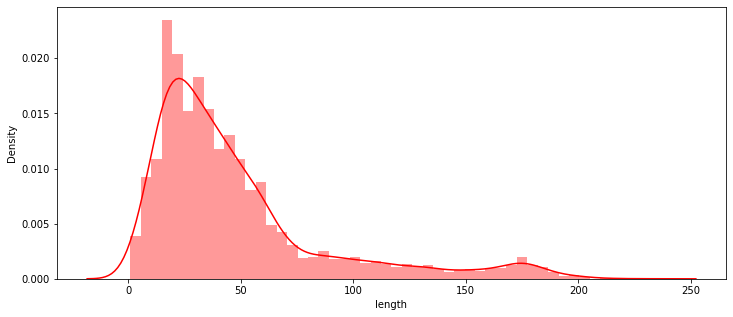

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns

train['length'] = train['document'].apply(lambda x: len(x))
plt.figure(figsize=(12,5))
sns.distplot(train['length'], color='r')

In [15]:
input_node = ak.TextInput()
output_node = ak.TextBlock()(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=20)
clf.fit(x_train, y_train, epochs=5)
model = clf.export_model()

Trial 20 Complete [00h 00m 31s]
val_loss: 0.2594645023345947

Best val_loss So Far: 0.2594645023345947
Total elapsed time: 00h 14m 25s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
313/313 [==============================] - 8s 21ms/step - loss: 0.8193 - accuracy: 0.7867
Epoch 2/5
313/313 [==============================] - 6s 20ms/step - loss: 0.2874 - accuracy: 0.9542
Epoch 3/5
313/313 [==============================] - 6s 20ms/step - loss: 0.2722 - accuracy: 0.9543
Epoch 4/5
313/313 [==============================] - 6s 20ms/step - loss: 0.2651 - accuracy: 0.9542
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 0.2576 - accuracy: 0.9543
INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


In [16]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model('./auto_model/best_model')